In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
def std(matrix):
    return (matrix - matrix.mean(axis=0))/matrix.std(axis=0)

In [3]:
grid_queen = pd.read_csv("data/grid_moran_queen.csv",index_col=0)
grid_exp = pd.read_csv("data/grid_moran_exp_exact.csv",index_col=0)

In [4]:
moran_grid_exp = std(grid_exp.iloc[:,2:-3].values)
moran_grid_queen = std(grid_queen.iloc[:,2:-3].values)

In [5]:
index = np.array([1,4,16,32,64,128]) - 1
data = moran_grid_queen.T[index]

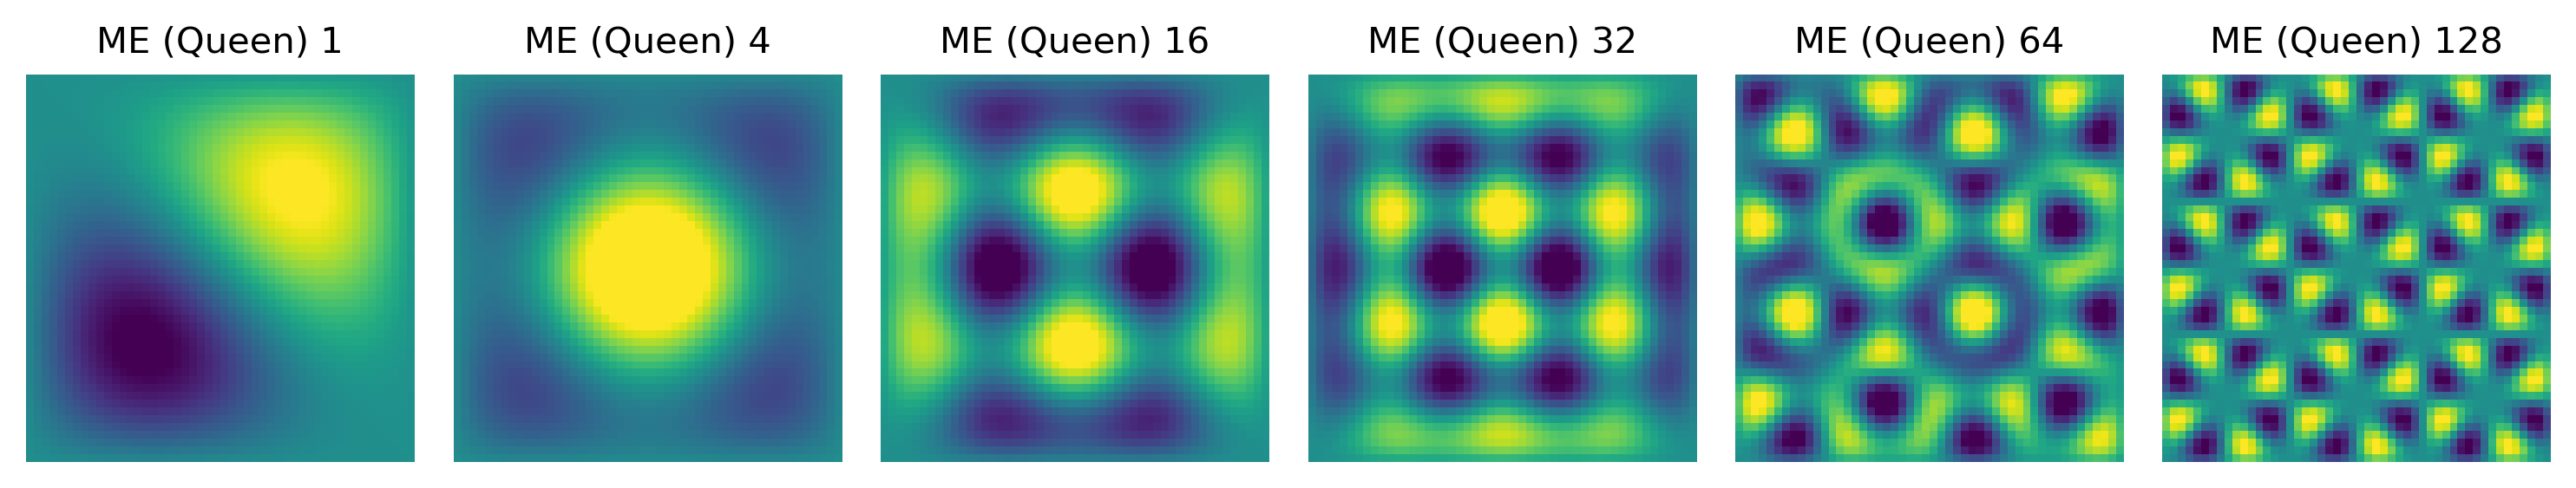

In [6]:
size=50
fig, axes = plt.subplots(nrows=1, ncols=6,figsize=(10, 10),dpi=300)
i = 0
for dat,ax in zip(data,axes.flat):
    ax.axis('off')
    im = ax.imshow(dat.reshape(size,size),vmin=-2,vmax=2)
    ax.set_title("ME (Queen) " + str(index[i]+1),fontsize=10)
    i = i + 1
plt.tight_layout()
plt.savefig("Grid_Queen_ME.png",dpi=600,bbox_inches='tight')

In [7]:
data = moran_grid_exp.T[index]

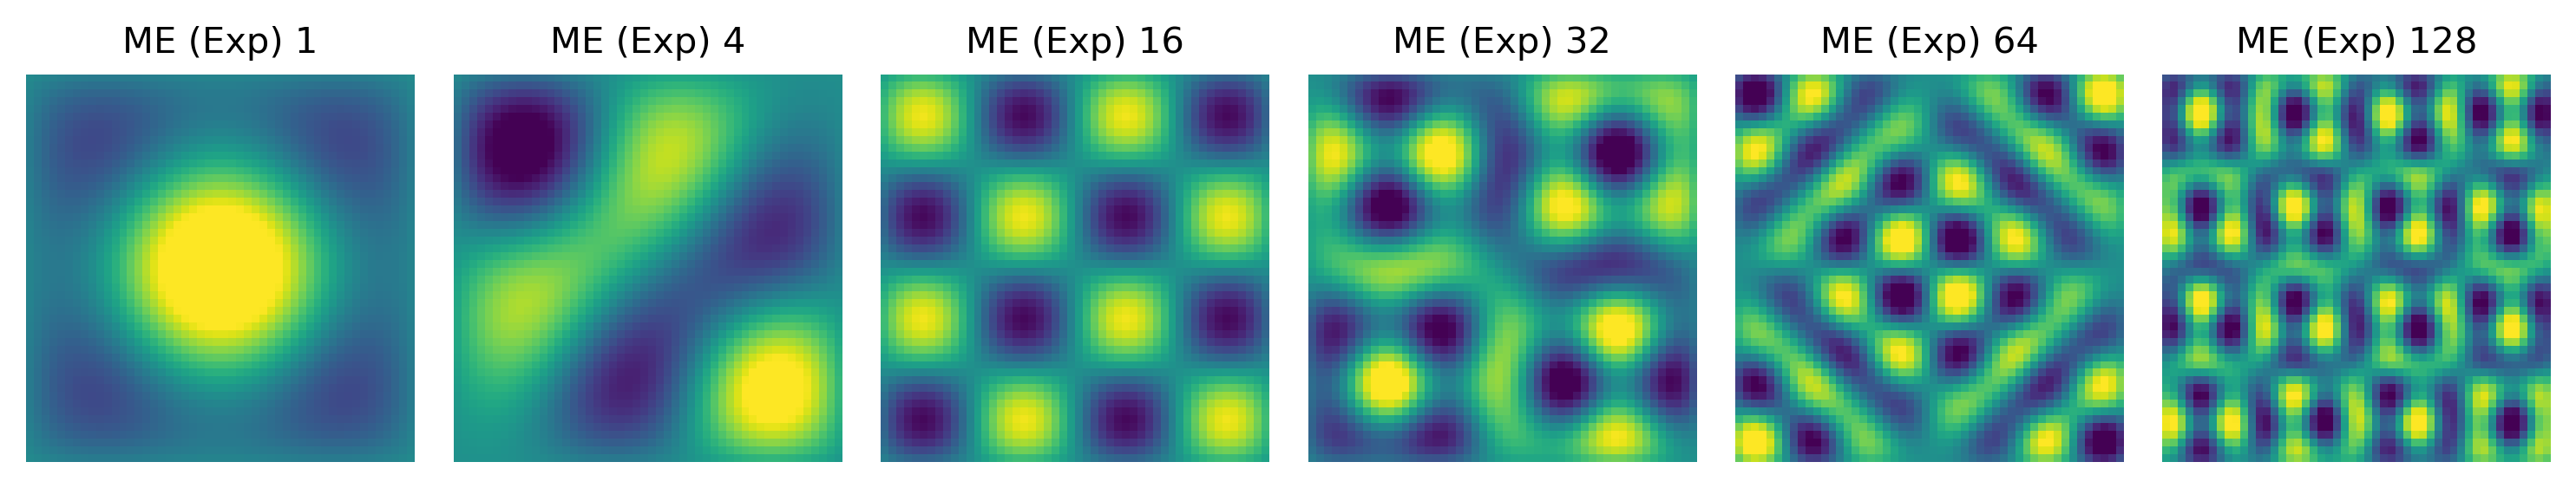

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=6,figsize=(10, 10),dpi=300)
i = 0
for dat,ax in zip(data,axes.flat):
    ax.axis('off')
    im = ax.imshow(dat.reshape(size,size),vmin=-2,vmax=2)
    ax.set_title("ME (Exp) " + str(index[i]+1),fontsize=10)
    i = i + 1
plt.tight_layout()
plt.savefig("Grid_EXP_ME.png",dpi=600,bbox_inches='tight')    

In [9]:
counties = gpd.read_file("data/counties_latlong.geojson")

In [10]:
us_queen = pd.read_csv("data/us_moran_queen.csv",index_col=0)
us_exp = pd.read_csv("data/us_moran_exp_exact.csv",index_col=0)

In [11]:
moran_us_exp = std(us_exp.iloc[:,2:-3].values)
moran_us_queen = std(us_queen.iloc[:,2:-3].values)

In [12]:
index = np.array([1,4,16,32,64,128]) - 1
data = moran_us_queen.T[index]

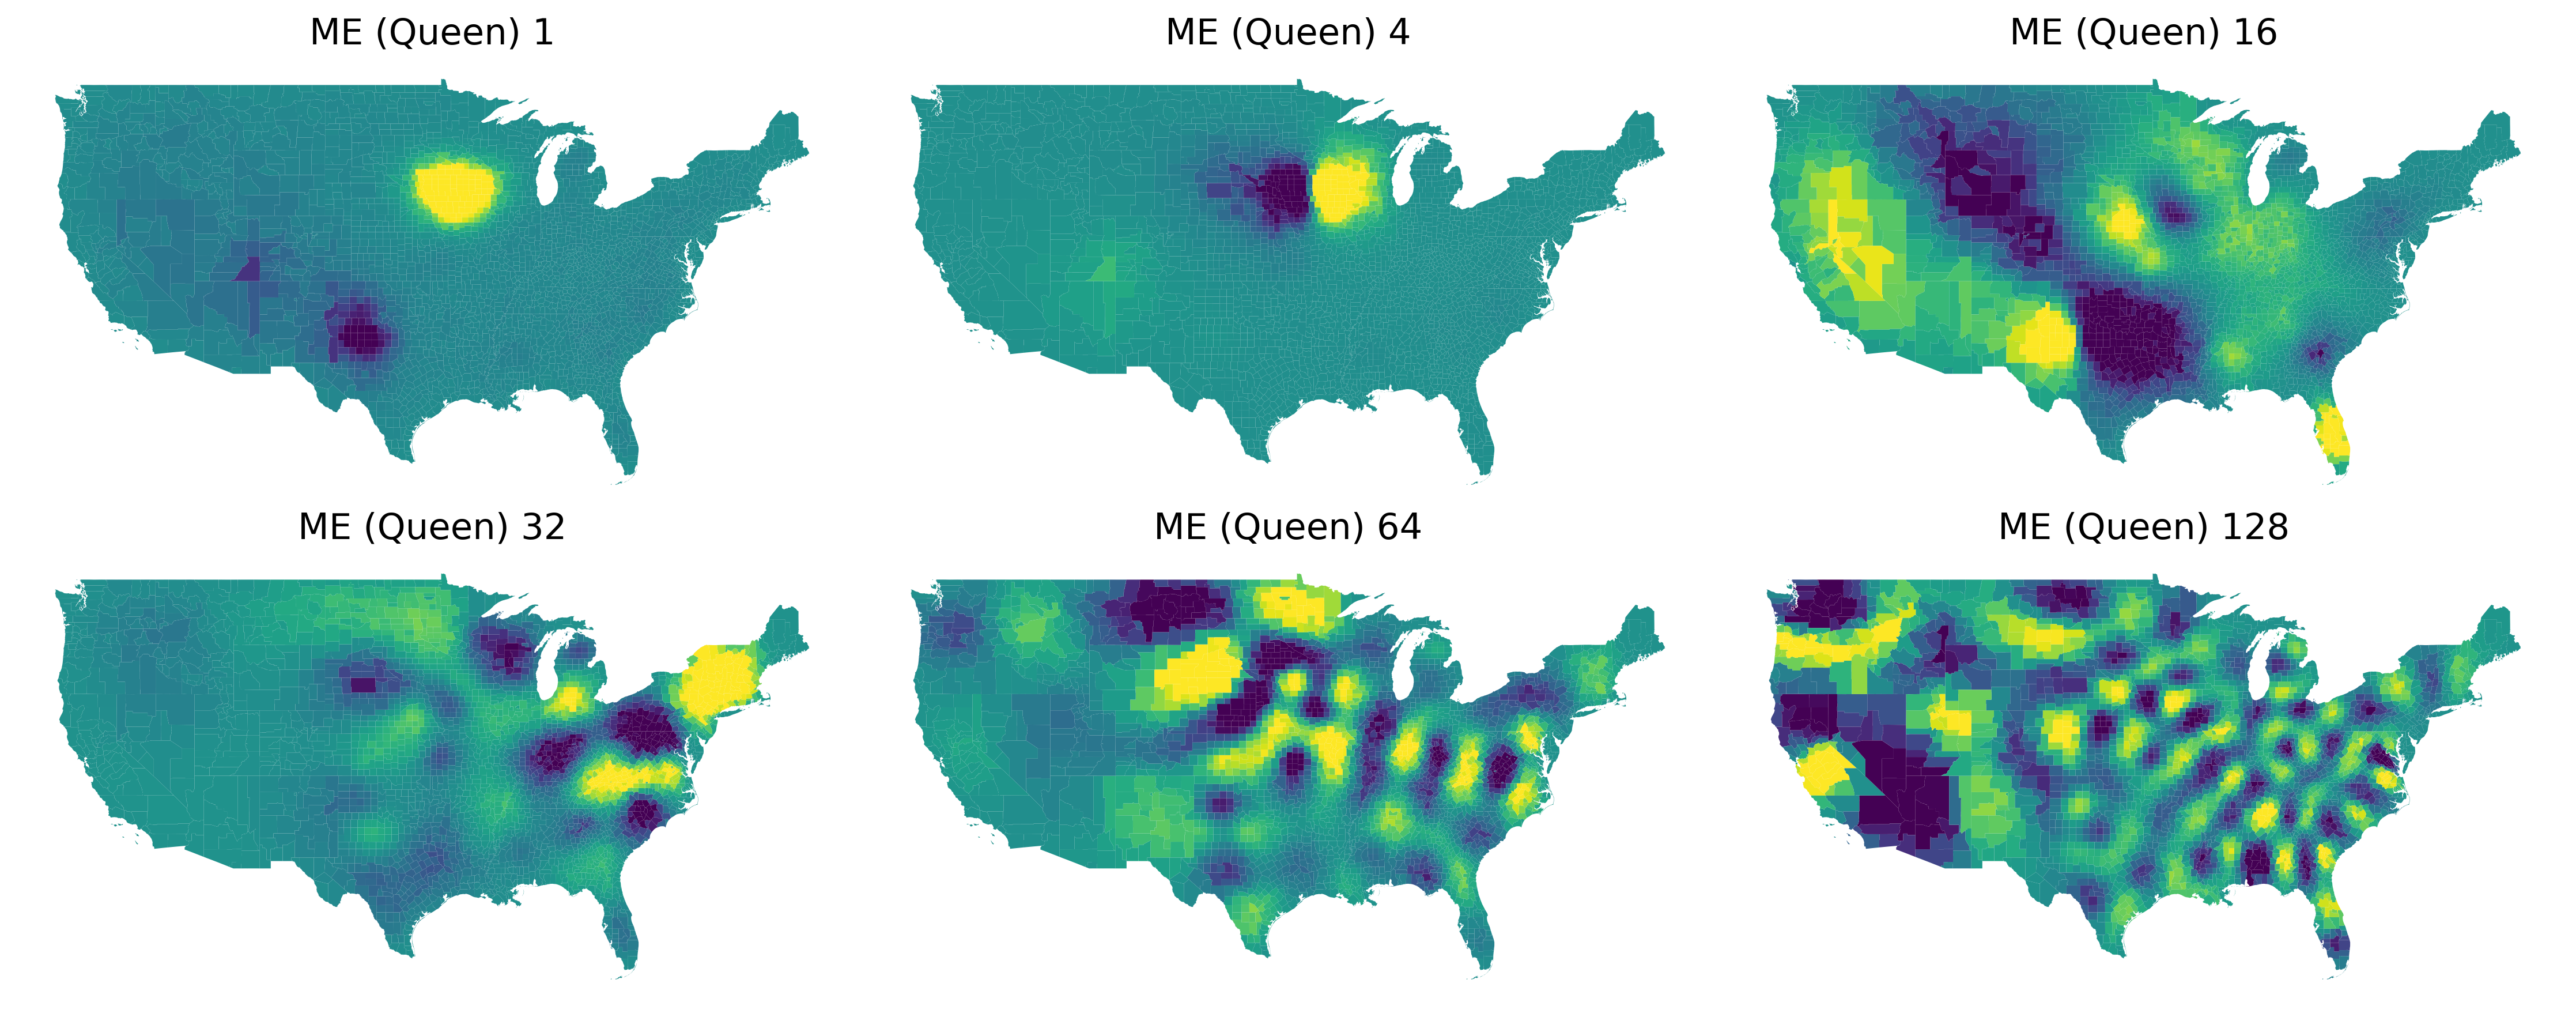

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15, 6),dpi=300)

i = 0

for dat,ax in zip(data,axes.flat):
    ax.axis('off')
    counties.plot(dat, ax=ax,vmin=-2,vmax=2)
    ax.set_title("ME (Queen) " + str(index[i]+1),fontsize=15)
    i = i + 1
    
plt.tight_layout()
plt.savefig("US_QUEEN_ME.png",dpi=600,bbox_inches='tight')

In [14]:
index = np.array([1,4,16,32,64,128]) - 1
data = moran_us_exp.T[index]

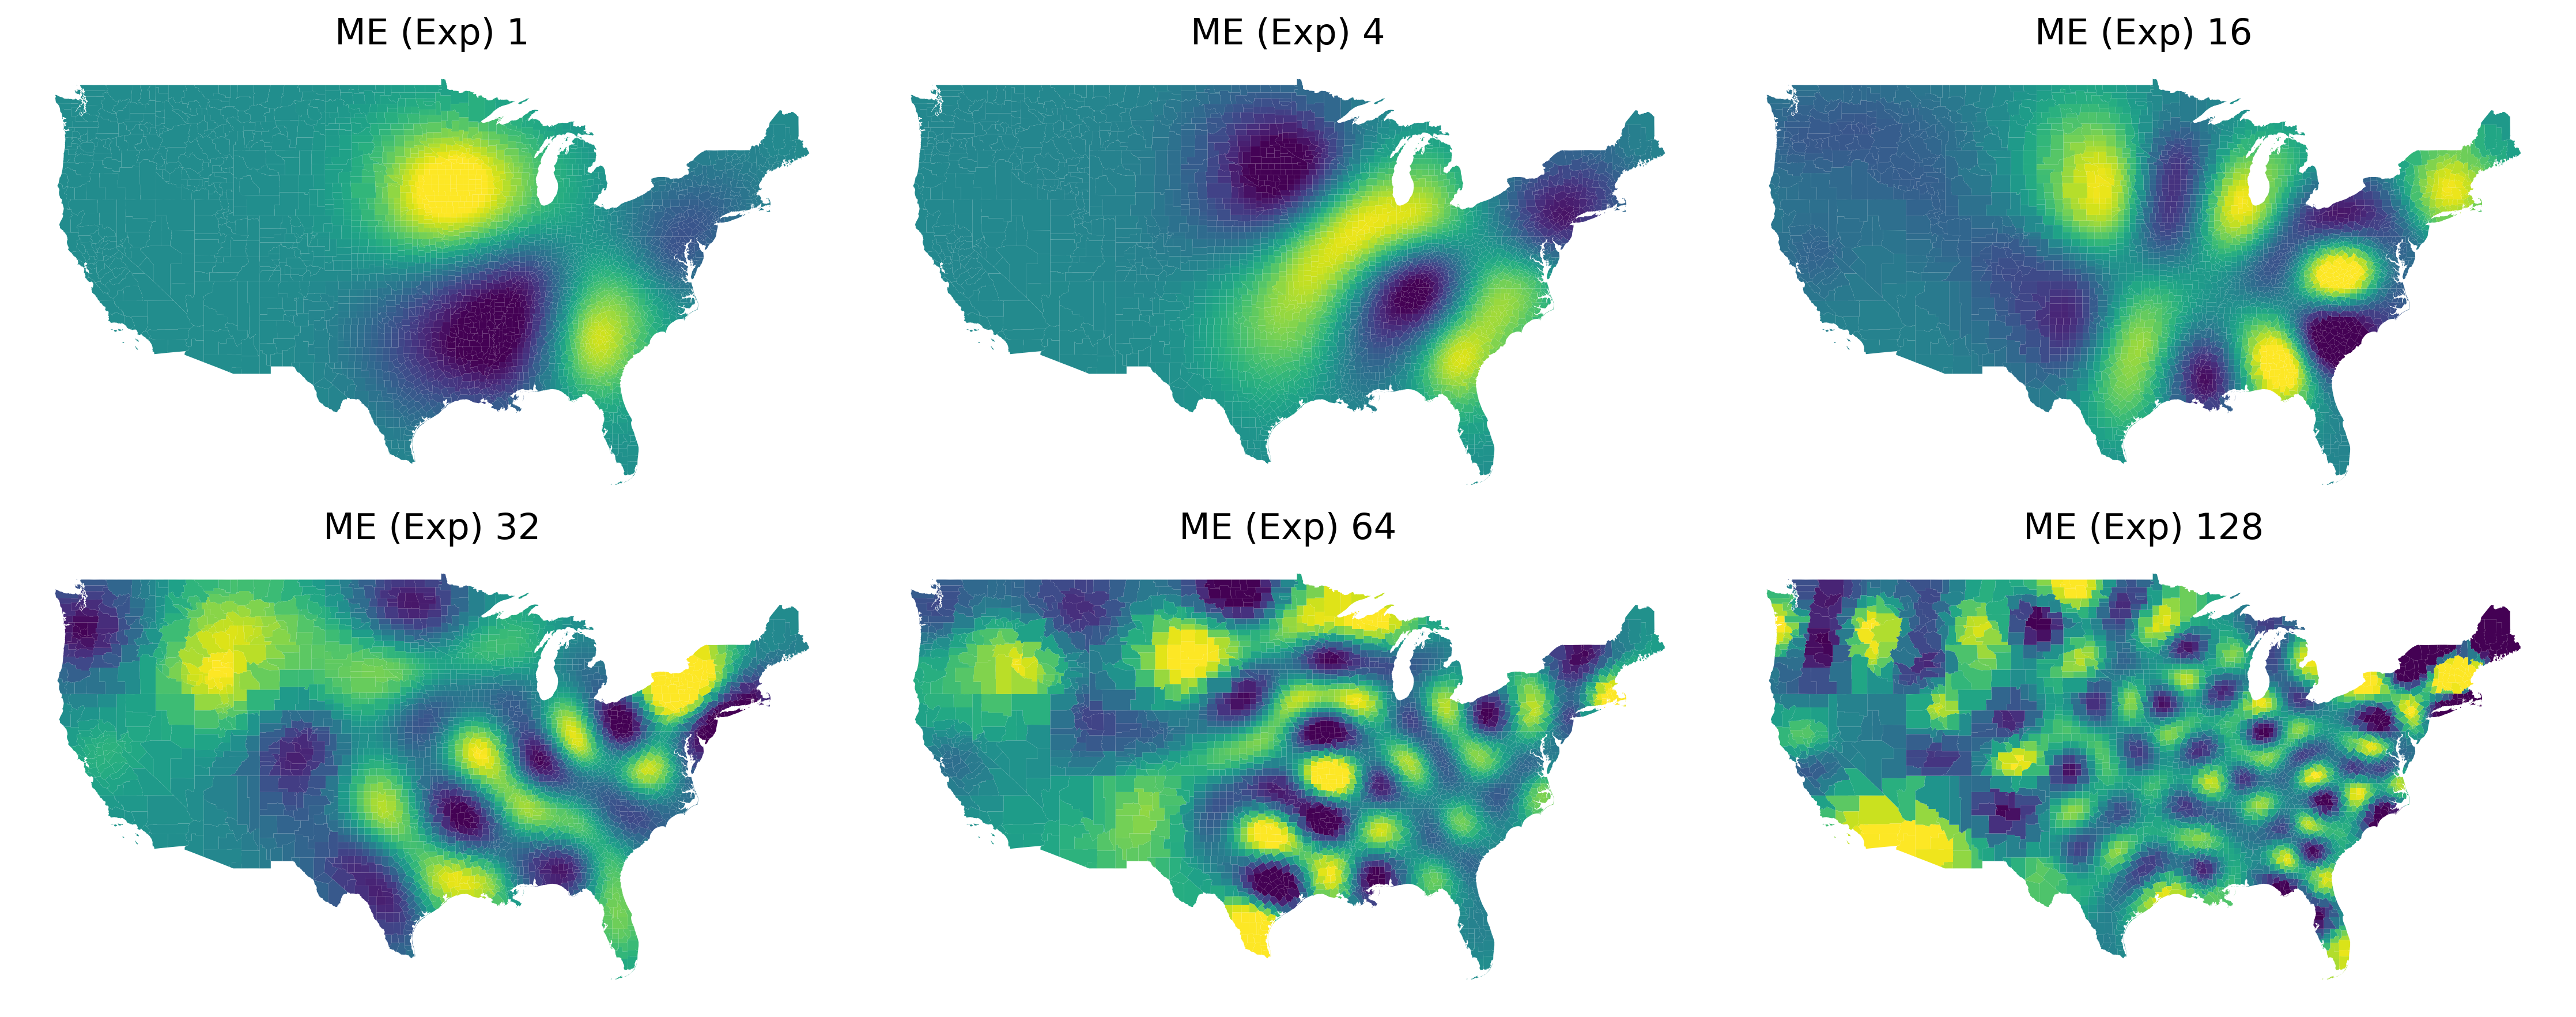

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15, 6),dpi=300)

i = 0

for dat,ax in zip(data,axes.flat):
    ax.axis('off')
    counties.plot(dat, ax=ax,vmin=-2,vmax=2)
    ax.set_title("ME (Exp) " + str(index[i]+1),fontsize=15)
    i = i + 1
    
plt.tight_layout()
plt.savefig("US_EXP_ME.png",dpi=600,bbox_inches='tight')

In [16]:
from matplotlib.colors import ListedColormap,BoundaryNorm

In [17]:
n_bins=128
cmap_name = 'viridis'
cmap = plt.get_cmap(cmap_name)

# Create a discrete colormap
colors = cmap(np.linspace(0, 1, n_bins))
discrete_cmap = ListedColormap(colors)

# Define the boundaries and norm for the discrete colormap
bounds = np.linspace(-2, 2, n_bins + 1)
ticks = np.linspace(-2, 2, 9)
norm = BoundaryNorm(bounds, discrete_cmap.N)

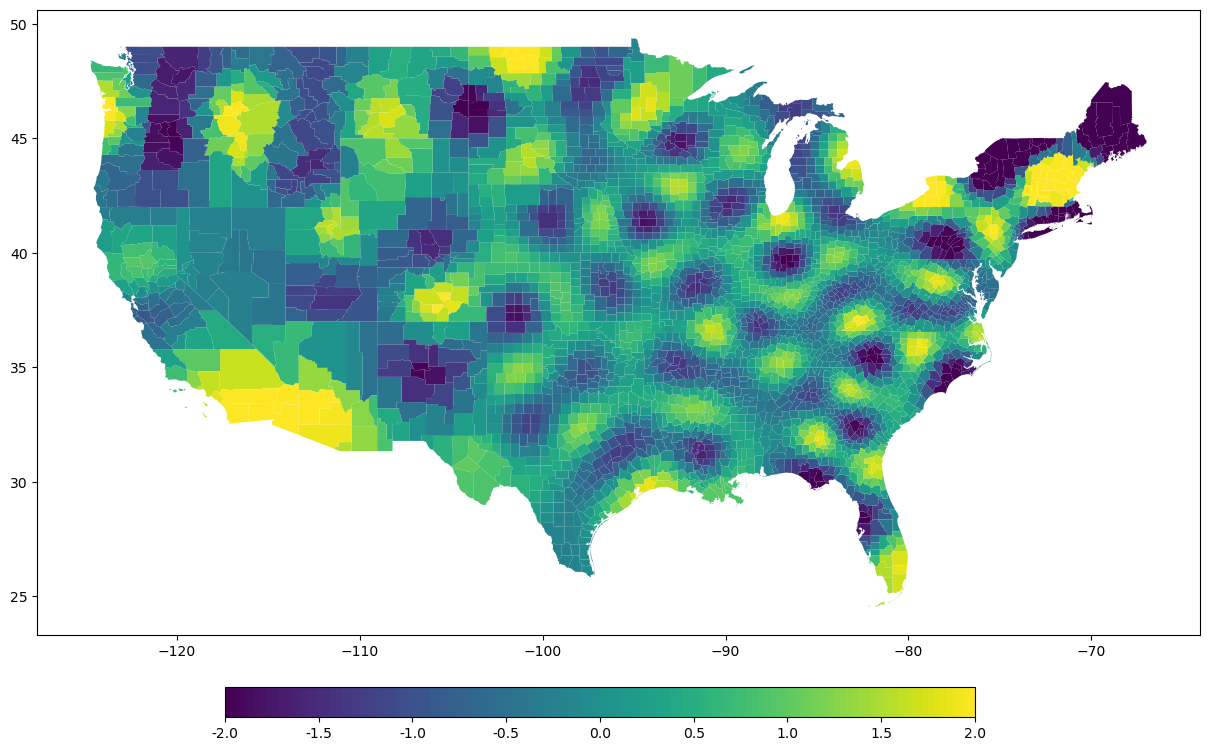

In [18]:
from matplotlib.colors import ListedColormap, BoundaryNorm

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
counties.plot(dat,vmin=-2,vmax=2,legend=False,ax=ax)


cax = fig.add_axes([0.25, 0.1, 0.5, 0.03])  # Position for the colorbar [left, bottom, width, height]
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap=discrete_cmap), cax=cax, orientation='horizontal')

# Set colorbar ticks and labels
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{bound:.1f}' for bound in ticks])
cbar.ax.minorticks_off()
#cbar.set_label('Data Values')
#plt.savefig("legend.png",dpi=600)